# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html

url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data

table = soup.find('table', class_='table')
rows = [
    [data.text.strip() for data in row.find_all('td')]
    for row in table.find_all('tr')[1:]
]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list

data = []

# Loop through the scraped data to create a list of rows

for row in table.find_all('tr')[1:]:
    cells = row.find_all('td')
    data.append([cell.text.strip() for cell in cells])


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

columns = [header.text.strip() for header in table.find_all('th')]
mars_weather_df = pd.DataFrame(data, columns=columns)

In [8]:
# Confirm DataFrame was created successfully

mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column

mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis

mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again

mars_weather_df.dtypes

id                   object
terrestrial_date     object
sol                  object
ls                   object
month                object
min_temp            float64
pressure            float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?

mars_months = mars_weather_df['month'].nunique()
print(f"There are {mars_months} months on Mars.")

There are 12 months on Mars.


In [13]:
# 2. How many sols (Martian days) worth of data are there?

total_sols = mars_weather_df['sol'].nunique()
print(f"There are {total_sols} sols (Martian days) worth of data.")

There are 1867 sols (Martian days) worth of data.


In [14]:
# 3. What is the average minimum temperature by month?

avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()
print(avg_min_temp_by_month)

month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64


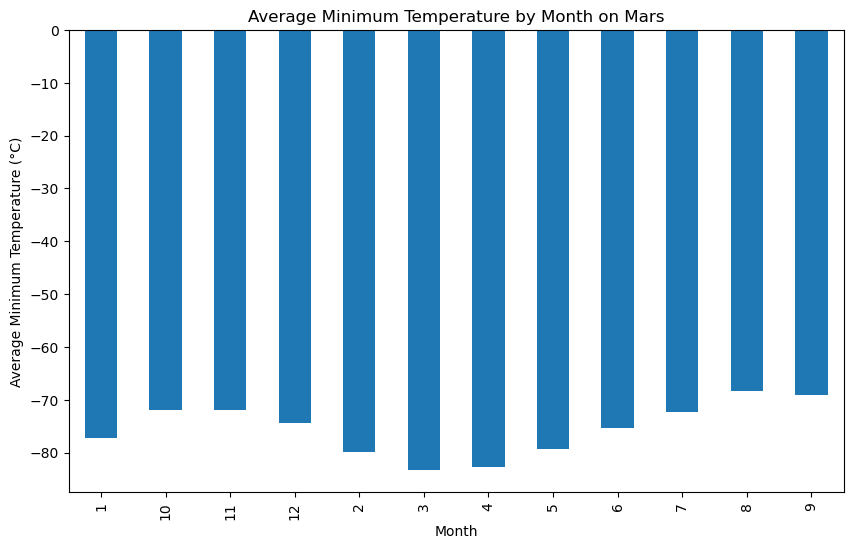

In [15]:
# Plot the average minimum temperature by month

avg_min_temp_by_month.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Month on Mars')
plt.show()

Coldest Month:
month
3   -83.307292
Name: min_temp, dtype: float64

Hottest Month:
month
8   -68.382979
Name: min_temp, dtype: float64


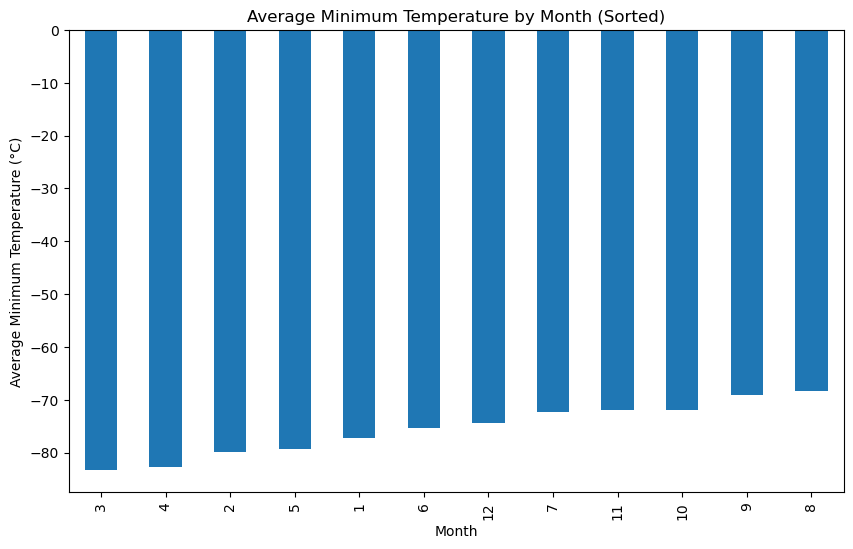

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

sorted_avg_min_temp = avg_min_temp_by_month.sort_values()

print("Coldest Month:")
print(sorted_avg_min_temp.head(1))

print("\nHottest Month:")
print(sorted_avg_min_temp.tail(1))

# Plot the sorted temperatures
sorted_avg_min_temp.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Month (Sorted)')
plt.show()

In [17]:
# 4. What is the average pressure by month?

avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()
print(avg_pressure_by_month)

month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64


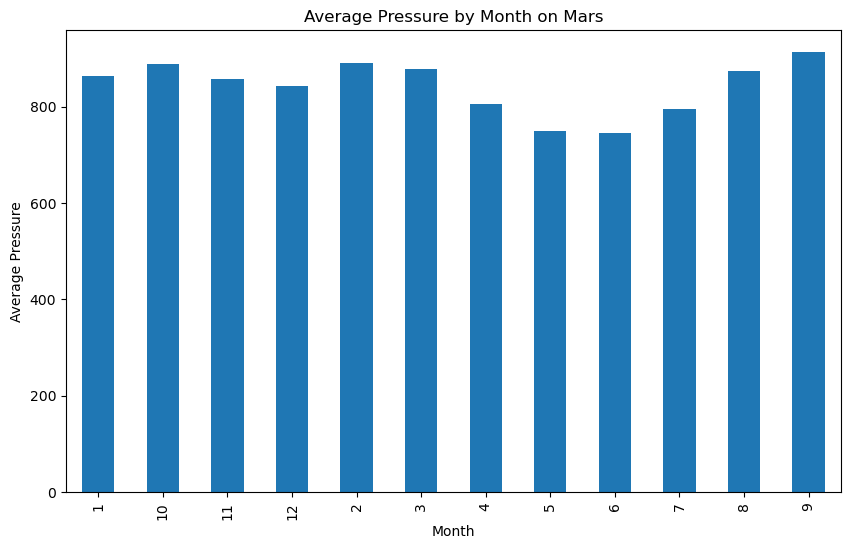

In [18]:
# Plot the average pressure by month

avg_pressure_by_month.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month on Mars')
plt.show()

Lowest Pressure Month:
month
6    745.054422
Name: pressure, dtype: float64

Highest Pressure Month:
month
9    913.30597
Name: pressure, dtype: float64


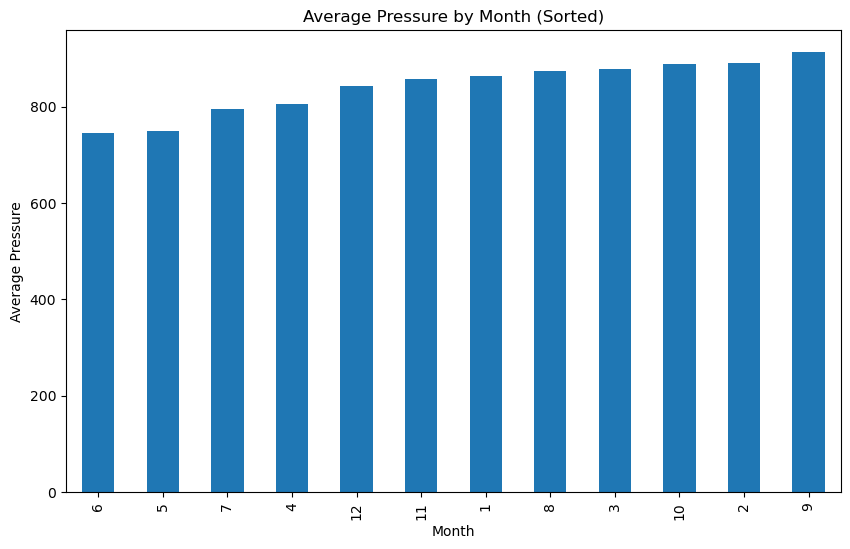

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the average pressure
sorted_avg_pressure = avg_pressure_by_month.sort_values()

print("Lowest Pressure Month:")
print(sorted_avg_pressure.head(1))

print("\nHighest Pressure Month:")
print(sorted_avg_pressure.tail(1))

# Plot the sorted pressures
sorted_avg_pressure.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month (Sorted)')
plt.show()


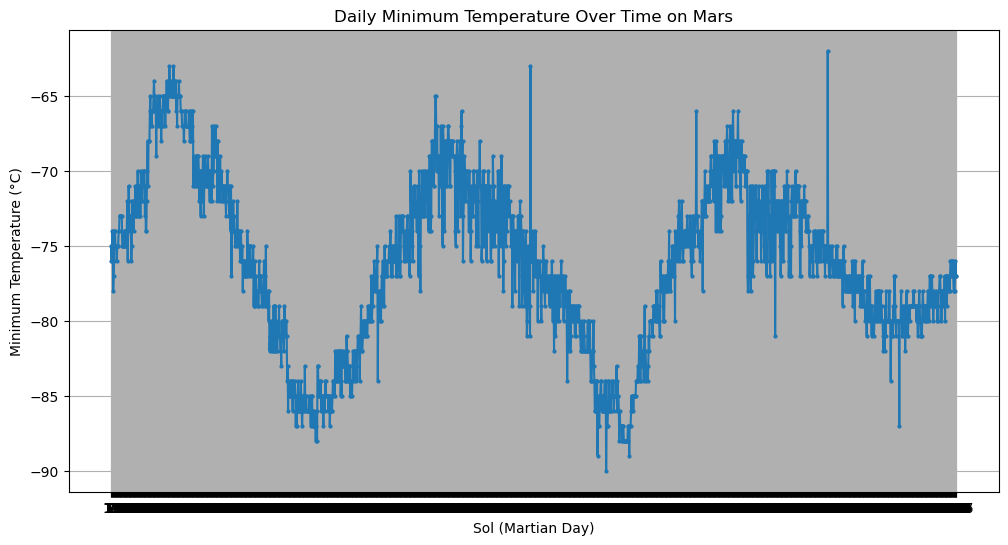

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

plt.figure(figsize=(12, 6))
plt.plot(mars_weather_df['sol'], mars_weather_df['min_temp'], marker='o', linestyle='-', markersize=2)
plt.xlabel('Sol (Martian Day)')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Daily Minimum Temperature Over Time on Mars')
plt.grid()
plt.show()


#### Minimum Temperature

The coldest month, on average, is Month 3, with the lowest average minimum temperature recorded.
The hottest month, on average, is Month 8, with the highest average minimum temperature recorded.

#### Atmospheric Pressure

The month with the lowest average atmospheric pressure is Month 6, indicating the thinnest atmosphere during this period.
The month with the highest average atmospheric pressure is Month 9, indicating the thickest atmosphere during this period.

#### Year Length
From the visual analysis of the daily minimum temperature graph, we observe a repeating temperature pattern that represents a Martian year. The cycle completes approximately every 687 terrestrial days, which is within 25% of the actual Martian year length (around 687 Earth days).

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV

output_path = 'mars_weather_data.csv'
mars_weather_df.to_csv(output_path, index=False)
print(f"Data successfully written to {output_path}")

Data successfully written to mars_weather_data.csv


In [22]:
browser.quit()